# 3. Time series

Time series are one of the simplest and most intuitive visualizations around. Multiplex extends matplotlib's plotting functionality and makes it better to tell a story through time series visualizations.

In this notebook, we first show a simple time series to acclimate with Multiplex's time series visualization. Then, we go through a running example, transforming a simple time series into an expressive figure that tells a story.

In [1]:
%load_ext autoreload
%autoreload 2

import importlib
import matplotlib.pyplot as plt
import os
import pandas as pd
import sys

path = sys.path[0]
path = os.path.join(path, "..")
if path not in sys.path:
    sys.path.insert(1, path)

Data can be very simple, and visualizations can be too. If you're in a rush or creating visualizations to explore the data, you need only choose the style and pipe in the data. In the first example, we first load data that shows how temperatures deviated from the average over the years.

In [2]:
# load the data
df = pd.read_csv('data/global_temperatures.csv')
df.sort_values('Year', inplace=True)
df = df[df['Source'] == 'GISTEMP']
df

,Source,Year,Mean
273,GISTEMP,1880,-0.20
271,GISTEMP,1881,-0.12
269,GISTEMP,1882,-0.10
267,GISTEMP,1883,-0.21
265,GISTEMP,1884,-0.28
...,...,...,...
9,GISTEMP,2012,0.63
7,GISTEMP,2013,0.65
5,GISTEMP,2014,0.74
3,GISTEMP,2015,0.87


As you can see, the data is quite self-explanatory, so the visualization does not need to be encumbered by needless information. Therefore all we do is load a style and pipe in the data to the `draw_time_series` function.

Remember, the `draw_time_series` function is a Drawable function, like the rest of Multiplex's visualizations. However, we modify the plot by calling normal matplotlib functions on the same Drawable instance.

Apart from that, we give the visualization a title and caption to describe the figure better.

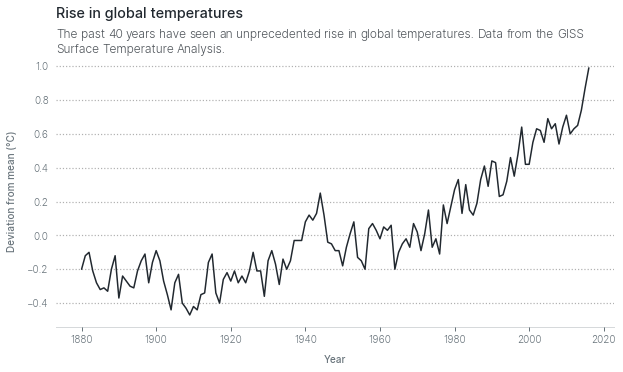

In [3]:
# import the Drawable class and set the style
from multiplex import drawable
drawable = importlib.reload(drawable)
plt.style.use(os.path.join(sys.path[0], '..', 'styles', "modern.style"))

# draw the visualization
figure = plt.figure(figsize=(10, 5))
viz = drawable.Drawable(figure)
viz.draw_time_series(df.Year, df.Mean)

# customize the plot
viz.set_xlabel('Year')
viz.set_ylabel('Deviation from mean (°C)')
viz.set_title('Rise in global temperatures', loc='left')
viz.set_caption("""The past 40 years have seen an unprecedented rise in global temperatures.
                   Data from the GISS Surface Temperature Analysis.""")
viz.savefig('exports/3-temperatures.png', dpi=300, bbox_inches='tight')

Data can be much more complex than that. The next visualization we build follows a running example: the top scorers in the English Premier League in the 2015/2016 season.

As usual, first we read the data. The Premier League season is split into 38 matches, or matchdays. Footballers score in these matches and at the end of the season, the player with the most goal is named the top scorer. The file contains data about the three players who scored the most goals: Leicester FC's Jamie Vardy, Tottenham Hotspur's Harry Kane, and Manchester City's Sergio Agüero.

The data contains the cumulative number of goals over these matchdays for each player. This means that at every matchday we have the number of goals that the player scored up until that point.

In [4]:
# load the data
df = pd.read_csv('data/top_scorers.csv')
df.index = df['Matchday']
df.drop('Matchday', axis=1, inplace=True)
df.loc[0] = [0, 0, 0]
df.sort_index(inplace=True)
df.tail()

,Kane,Vardy,Aguero
Matchday,,,
34,24,22,22
35,24,22,23
36,25,22,23
37,25,24,24
38,25,24,24


Next, we plot the time series for Jamie Vardy. Vardy is an English striker who played for the team that won the English Premier League in 2016. Along the way, he broke a record by scoring in 11 consecutive matches. This is the story that we will tell in the first plot.

The process is very similar to before, but this time, we style the plotted time series. We set a general style that we will re-use for all time series in this running examples. We also specify a style for Jamie Vardy's time series.

Note how this time, we specify a general style for labels—`label_style`—and give the time series a label—Vardy. The label is drawn at the end of the time series to improve readability. This is one of Multiplex's added features to matplotlib.

The same engine used to create [text visualizations](https://github.com/NicholasMamo/multiplex-plot/blob/master/examples/2.%20Text.ipynb) is used to draw the label. Therefore you can style the label in the same way you would style a text visualization. Any parameter accepted by matplotlib's Text can also be passed.

Matchday
0      0
1      1
2      1
3      1
4      2
5      3
6      4
7      6
8      7
9      9
10    10
11    11
12    12
13    13
14    14
15    14
16    15
17    15
18    15
19    15
20    15
21    15
22    15
23    16
24    18
25    18
26    19
27    19
28    19
29    19
30    19
31    19
32    19
33    21
34    22
35    22
36    22
37    24
38    24
Name: Vardy, dtype: int64


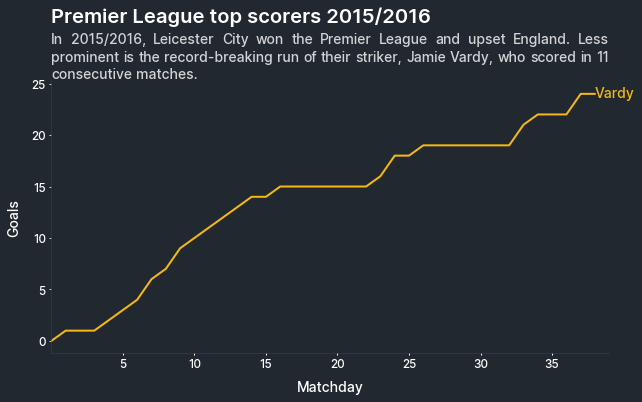

In [5]:
# reload the style
plt.style.use(os.path.join(sys.path[0], '..', 'styles', "multiplex-dark.style"))

# create a general style
style = { 'linewidth': 2, 'label_style': { 'fontweight': 500 } }

# create a specific style for Vardy's time series
vardy_style = { 'color': '#F6B913', 'label': 'Vardy' }

# draw the visualization
figure = plt.figure(figsize=(10, 5))
viz = drawable.Drawable(figure)
print(df.Vardy)
viz.draw_time_series(df.index, df.Vardy, **style, **vardy_style)

viz.set_xlim(0, 39)
viz.set_xticks(range(5, 38, 5))
viz.set_xlabel('Matchday')
viz.set_ylabel('Goals')

viz.set_title('Premier League top scorers 2015/2016', loc='left')
viz.set_caption("""In 2015/2016, Leicester City won the Premier League and upset England.
                   Less prominent is the record-breaking run of their striker, Jamie Vardy,
                   who scored in 11 consecutive matches.""", align='justify')
viz.show()

We can add more time series to the plot by calling the same `draw_time_series` function. We use different colors to distinguish the players. Note that Multiplex automatically distributes overlapping labels.

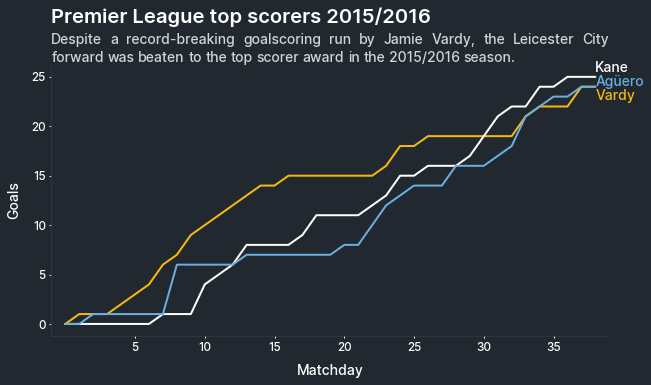

In [6]:
# create a specific style for Kane's and Agüero's time series
kane_style = { 'color': '#FFFFFF', 'label': 'Kane' }
aguero_style = { 'color': '#6BAEDF', 'label': 'Agüero' }

# draw the visualization
figure = plt.figure(figsize=(10, 5))
viz = drawable.Drawable(figure)
viz.draw_time_series(df.index.to_list(), df.Vardy.to_list(), **style, **vardy_style)
viz.draw_time_series(df.index.to_list(), df.Kane.to_list(), **style, **kane_style)
viz.draw_time_series(df.index.to_list(), df.Aguero.to_list(), **style, **aguero_style)

viz.set_xlim(-1, 39)
viz.set_xticks(range(5, 38, 5))
viz.set_xlabel('Matchday')
viz.set_ylabel('Goals')

viz.set_title('Premier League top scorers 2015/2016', loc='left')
viz.set_caption("""Despite a record-breaking goalscoring run by Jamie Vardy,
                   the Leicester City forward was beaten to the top scorer award
                   in the 2015/2016 season.""", align='justify')
viz.savefig('exports/3-overlapping-labels.png', dpi=300, bbox_inches='tight')

That time series looks good, but it doesn't tell the entire story. For example, the caption tells us that Vardy went on a goalscoring run, but when was that? And did you notice that Aguero scored five goals in one match? Maybe not.

A time series on its own does not tell the entire story. At best, it invites readers to interpret it. Multiplex allows you to annotate certain points on the time series using the `annotate` function. The following parameters are required:

- The annotation text,
- A tuple of x-coordinates delimiting the start and end of the annotation, and
- The y-coordinate of the annotation.

Once again, annotations use Multiplex's text engine, which means that you can style text as usual by passing on additional arguments. You can also add a marker to the annotation using the `marker` key.

For more advanced annotations, you can split the annotation text into tokens and provide individual styles as described in the[text visualizations tutorial](https://github.com/NicholasMamo/multiplex-plot/blob/master/examples/2.%20Text.ipynb).

One final change in this visualization is that instead of drawing labels at the end of the line, we draw a proper legend. To do this, we pass the `with_legend` parameter with a boolean when creating time series.

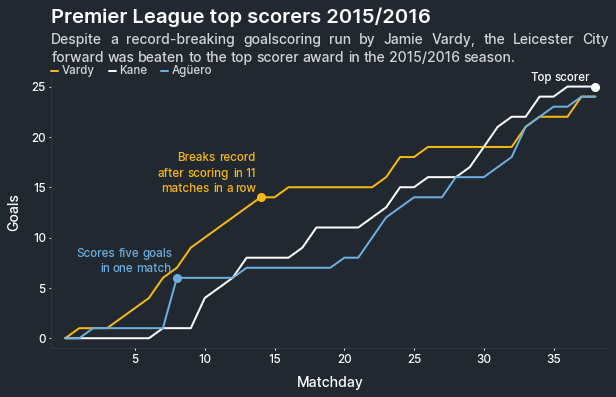

In [7]:
# draw the time series
figure = plt.figure(figsize=(10, 5))
viz = drawable.Drawable(figure)
viz.draw_time_series(df.index.to_list(), df.Vardy.to_list(), **style, **vardy_style, with_legend=True)
viz.draw_time_series(df.index.to_list(), df.Kane.to_list(), **style, **kane_style, with_legend=True)
viz.draw_time_series(df.index.to_list(), df.Aguero.to_list(), **style, **aguero_style, with_legend=True)

# create a general style for annotations and their markers
annotation_style = { 'fontsize': 'small', 'va': 'bottom', 'align': 'right', 'pad': 0.25 }
marker_style = { 'marker': 'o', 'markersize': 8 }

# create specific styles so that the annotation and the time series have the same color
vardy_annotation_style = { 'color': '#F6B913' }
kane_annotation_style = { 'color': '#FFFFFF' }
aguero_annotation_style = { 'color': '#6BAEDF' }

# draw the annotations
viz.annotate('Breaks record after scoring in 11 matches in a row', (6, 14), 14,
             marker=marker_style, **annotation_style, **vardy_annotation_style)
viz.annotate('Top scorer', (30, 38), 25,
             marker=marker_style, **annotation_style, **kane_annotation_style)
viz.annotate('Scores five goals in one match', (0, 8), 6,
             marker=marker_style, **annotation_style, **aguero_annotation_style)

# finalize the time series
viz.set_xlim(-1, 39)
viz.set_ylim(-1, 26)
viz.set_xticks(range(5, 38, 5))
viz.set_xlabel('Matchday')
viz.set_ylabel('Goals')

viz.set_title('Premier League top scorers 2015/2016', loc='left')
viz.set_caption("""Despite a record-breaking goalscoring run by Jamie Vardy,
                   the Leicester City forward was beaten to the top scorer award
                   in the 2015/2016 season.""", align='justify')
viz.savefig('exports/3-time-series.png', dpi=300, bbox_inches='tight')

You can learn more about time series visualizations, including functionality that was not covered in this tutorial, on [Multiplex's documentation site](https://nicholasmamo.github.io/multiplex-plot/timeseries.html). You can continue learning about Multiplex in the [network graphs tutorial](https://github.com/NicholasMamo/multiplex-plot/blob/master/examples/4.%20Network%20graphs.ipynb).